# use mpltex

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mpltex

@mpltex.acs_decorator
def my_plot(t):
    fig, ax = plt.subplots(1)
    linestyles = mpltex.linestyle_generator()
    ax.plot(t, t, label='$t$', **linestyles.next())
    ax.plot(t, t**2, label='$t^2$', **linestyles.next())
    ax.plot(t, t**3, label='$t^3$', **linestyles.next())
    ax.plot(t, t**4, label='$t^4$', **linestyles.next())
    ax.plot(t, np.log(1+t), label='$\ln(1+t)$', **linestyles.next())
    ax.plot(t, t**(1./2), label='$t^{1/2}$', **linestyles.next())
    ax.plot(t, t**(1./3), label='$t^{1/3}$', **linestyles.next())

    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.legend(loc='best', ncol=2)
    fig.tight_layout(pad=0.1)
    fig.savefig('mpltex-acs-line-markers.pdf')

t = np.arange(0, 1.0+0.05, 0.05)
my_plot(t)
# plt.close('all')

AttributeError: 'generator' object has no attribute 'next'

# Use matplot

[29.97443843  2.29141477]


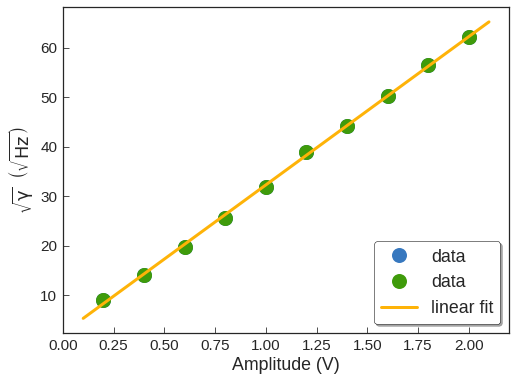

In [13]:
# https://matplotlib.org/users/customizing.html
# https://github.com/jbmouret/matplotlib_for_papers

%matplotlib inline
import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 7*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7*2.54,
    'lines.linewidth':2,
    'legend.fontsize': 7*2.54,
    'xtick.labelsize': 6*2.54,
    'ytick.labelsize': 6*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)
# mpl.rcParams.items()
# other package import
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

import numpy as np

noise_amplitude = np.linspace(0.2,2.0,10)
x = noise_amplitude

decay_rate  = [ 82.550,  199.789,  391.643,  657.524, 1018.523,
                  1521.611, 1945.286, 2532.927, 3188.046, 3864.099]
decay_rate  = np.array(decay_rate)

from scipy.optimize import curve_fit

def line_fit(x,a,b):
    return a *x +b


y = np.sqrt(decay_rate)
popt,perr =  curve_fit(line_fit,x,y,[30.0,0.0])
print(popt)
# print(np.linalg(perr))

x_fit = np.linspace(0.1,2.1,100)
y_fit = line_fit(x_fit,*popt)

plt.plot(x, y, 'o', label='data',color ="xkcd:windows blue",markersize=15)
plt.plot(x, y, 'o', label='data',color ="xkcd:grass green",markersize=15)
# plt.plot(x, y, 'o', label='data',color ="xkcd:yellow",markersize=15)
plt.plot(x_fit, y_fit,label = 'linear fit',color ="xkcd:amber",linewidth=3)

# set legend
leg = plt.legend(loc=4)
legfm = leg.get_frame()
legfm.set_edgecolor('black') # set legend fame color
legfm.set_linewidth(0.5)   # set legend fame linewidth

plt.xlabel('Amplitude (V)')
plt.ylabel(r'$\mathsf{\sqrt{\gamma} \;\; \left(\sqrt{Hz}\right)}$')

# plt.savefig('noise spetrum.png', dpi=600)  # 保存成png， 选择分辨率
plt.savefig('dephasing_with_amp.pdf')  # 保存成eps格式

## Auto Select color

* Fitted Curve and Dot
* Set Fitted curve and Dot in same color and legend

[29.97443843  2.29141477]


Text(0,0.5,u'$\\mathsf{\\sqrt{\\gamma} \\;\\; \\left(\\sqrt{Hz}\\right)}$')

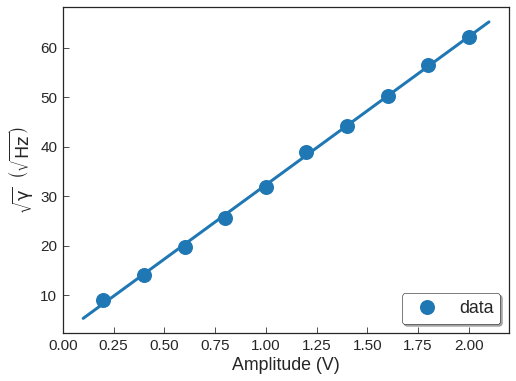

In [17]:
decay_rate  = [ 82.550,  199.789,  391.643,  657.524, 1018.523,
                  1521.611, 1945.286, 2532.927, 3188.046, 3864.099]
decay_rate  = np.array(decay_rate)

def line_fit(x,a,b):
    return a *x +b


y = np.sqrt(decay_rate)
popt,perr =  curve_fit(line_fit,x,y,[30.0,0.0])
print(popt)
# print(np.linalg(perr))

x_fit = np.linspace(0.1,2.1,100)
y_fit = line_fit(x_fit,*popt)


ax = plt.gca()

# plt.plot(x, y, 'o', label='data',color ="xkcd:windows blue",markersize=15)
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(x, y, 'o', label='data',color =color,markersize=15)

# Not show legend
plt.plot(x_fit, y_fit,label = '_nolegend_',color =color,linewidth=3)

# set legend
leg = plt.legend(loc=4)
legfm = leg.get_frame()
legfm.set_edgecolor('black') # set legend fame color
legfm.set_linewidth(0.5)   # set legend fame linewidth

plt.xlabel('Amplitude (V)')
plt.ylabel(r'$\mathsf{\sqrt{\gamma} \;\; \left(\sqrt{Hz}\right)}$')

## 指数坐标轴

## subplots

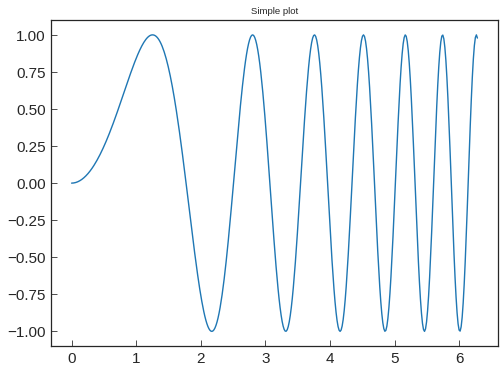

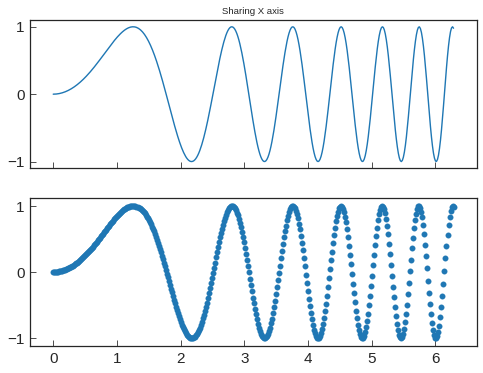

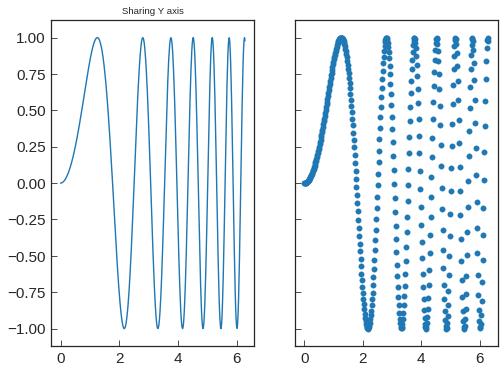

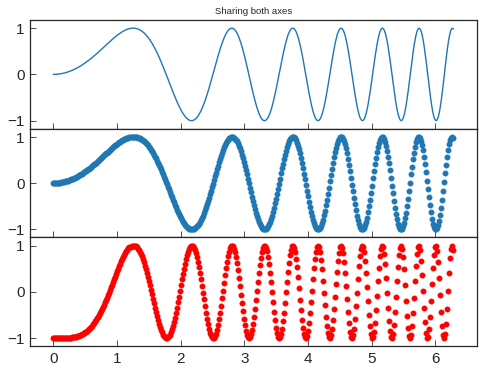

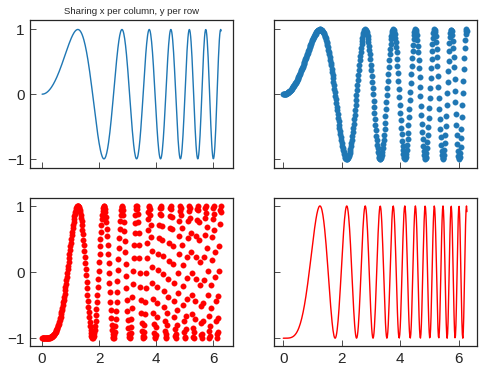

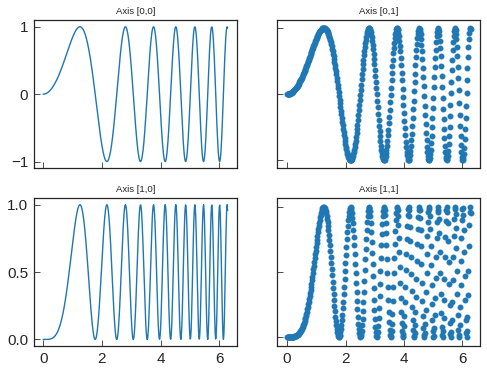

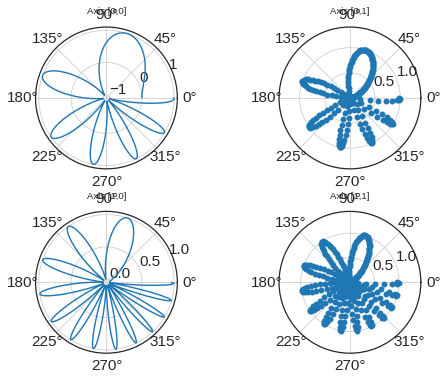

In [9]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()


## Share axies

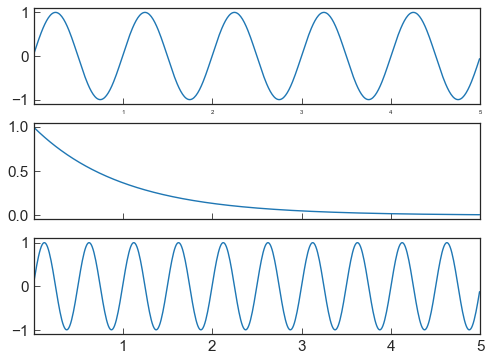

In [26]:
"""
You can share the x or y axis limits for one axis with another by
passing an axes instance as a sharex or sharey kwarg.

Changing the axis limits on one axes will be reflected automatically
in the other, and vice-versa, so when you navigate with the toolbar
the axes will follow each other on their shared axes.  Ditto for
changes in the axis scaling (e.g., log vs linear).  However, it is
possible to have differences in tick labeling, e.g., you can selectively
turn off the tick labels on one axes.

The example below shows how to customize the tick labels on the
various axes.  Shared axes share the tick locator, tick formatter,
view limits, and transformation (e.g., log, linear).  But the ticklabels
themselves do not share properties.  This is a feature and not a bug,
because you may want to make the tick labels smaller on the upper
axes, e.g., in the example below.

If you want to turn off the ticklabels for a given axes (e.g., on
subplot(211) or subplot(212), you cannot do the standard trick

   setp(ax2, xticklabels=[])

because this changes the tick Formatter, which is shared among all
axes.  But you can alter the visibility of the labels, which is a
property

  setp( ax2.get_xticklabels(), visible=False)

"""
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

# Use seaborn

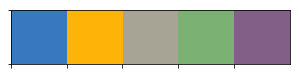

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# xcd color reference http://xkcd.com/color/rgb/
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set(palette=sns.xkcd_palette(colors))

# set seaborn style: https://seaborn.pydata.org/tutorial/aesthetics.html
# matplot rc setting : https://matplotlib.org/users/customizing.html
sns.set_style("ticks",  # tickets 模版
              {'axes.edgecolor': 'black',
               'legend.frameon': True,
               'legend.linewidth': 0.5,
               'legend.edgecolor': 'black',
               "xtick.direction": "in",
               "ytick.direction": "in", # ticket inside
              })

sns.set_context("paper", # The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”,
                font_scale=1.4,
                rc={
                    "lines.linewidth": 2,
                    'text.usetex' : True,}
               )  

[29.97443843  2.29141477]


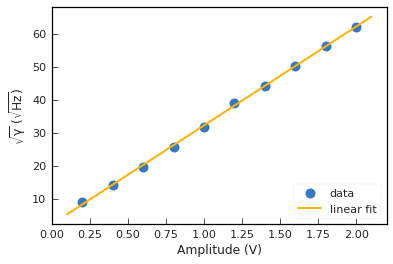

In [5]:
import numpy as np

noise_amplitude = np.linspace(0.2,2.0,10)
x = noise_amplitude

decay_rate  = [ 82.550,  199.789,  391.643,  657.524, 1018.523,
                  1521.611, 1945.286, 2532.927, 3188.046, 3864.099]
decay_rate  = np.array(decay_rate)

from scipy.optimize import curve_fit

def line_fit(x,a,b):
    return a *x +b


y = np.sqrt(decay_rate)
popt,perr =  curve_fit(line_fit,x,y,[30.0,0.0])
print(popt)
# print(np.linalg(perr))

x_fit = np.linspace(0.1,2.1,100)
y_fit = line_fit(x_fit,*popt)

plt.plot(x, y, 'o', label='data',color =sns.xkcd_rgb["windows blue"],markersize=10)
plt.plot(x_fit, y_fit,label = 'linear fit',color =sns.xkcd_rgb["amber"],linewidth=2)


plt.xlabel('Amplitude (V)')
plt.ylabel(r'$\mathsf{\sqrt{\gamma} \; (\sqrt{Hz})}$')

plt.grid(False)
leg = plt.legend(loc=4)
# leg.get_frame().set_edgecolor('black')
# leg.get_frame().set_linewidth(0.5)
# leg.get_frame().set_facecolor('none')

# plt.savefig('noise spetrum.png', dpi=600)  # 保存成png， 选择分辨率
plt.savefig('dephasing_with_amp.pdf')  # 保存成eps格式

In [4]:
data = np.loadtxt('./#6-4-1-11',delimiter='\t',skiprows=5)

x = np.arange(51)*0.2
y = np.arange(51)*0.2

#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap = sns.diverging_palette(239, 20, n=7,as_cmap=True)
#h = plt.contourf(M_L,M_R,Paras['C0']*2,cmap=cmap,shade=True)
levels = np.linspace(0, 200, 25)
plt.contourf(x,y,data,cmap=cmap,levels=levels,shade=True)
plt.colorbar()
plt.xlabel(r'X ($\mu$m)')
#plt.ylim(98,100)
plt.ylabel(r'Y ($\mu$m)')

NameError: name 'sns' is not defined

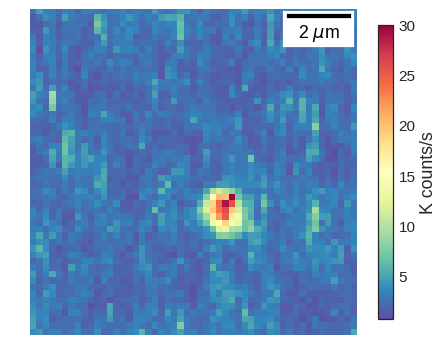

In [14]:
data = np.loadtxt('./#6-4-1-11',delimiter='\t',skiprows=5)

img = plt.imshow(data*50/1000)
img.set_cmap('Spectral_r')
plt.axis('off')
img.set_clim(vmax=30)
plt.colorbar(shrink=0.9,label='K counts/s')

scalebar = ScaleBar(0.2,units=r'um') # 1 pixel = 0.2 um
plt.gca().add_artist(scalebar)
plt.savefig('SiV_Center.pdf')  # 保存成eps格式

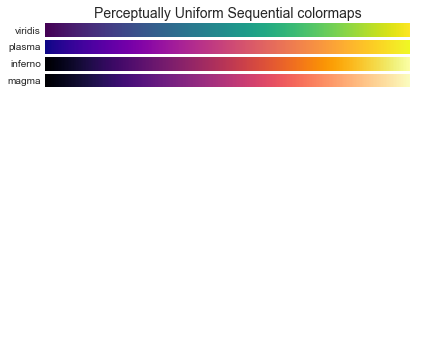

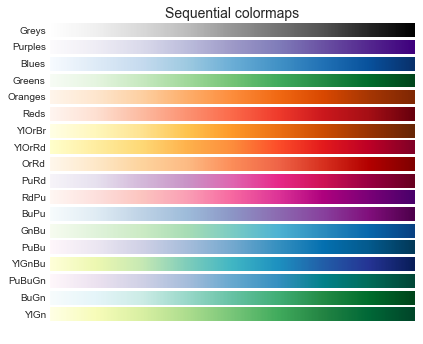

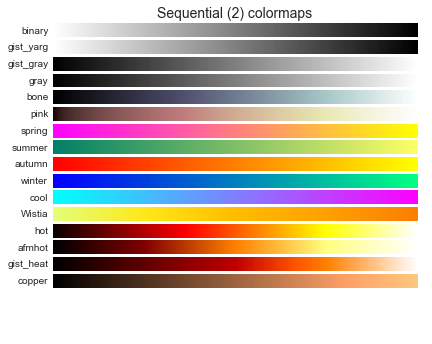

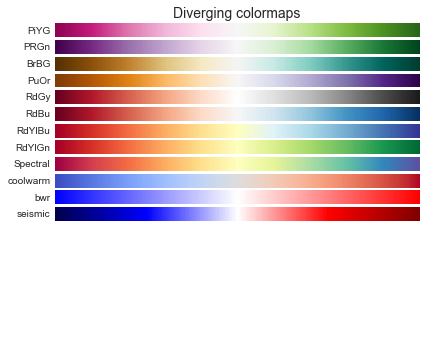

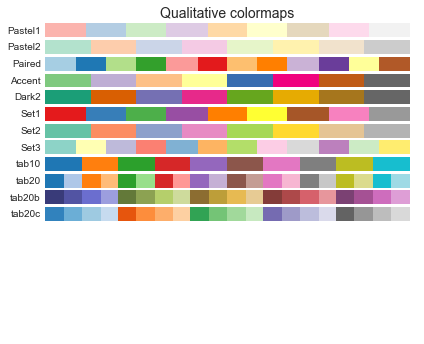

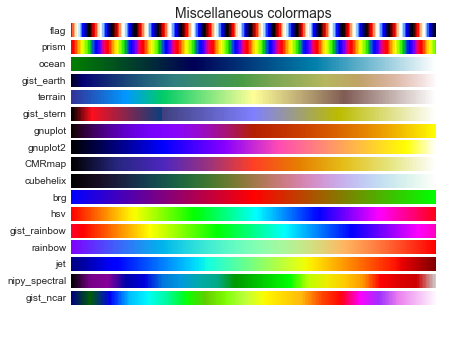

In [27]:
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

## 柱状图统计

[ 2.2  2.6  3.   3.4  3.8]
[ 3.22097416]


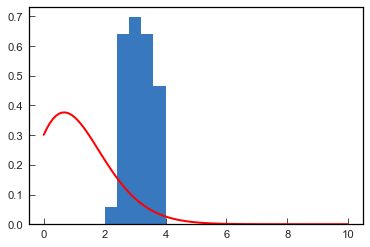

In [75]:
import pandas as pd
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy.misc import factorial


df = pd.read_csv('./Grains.csv',delimiter='\t',index_col='index')

data = df['diameter'].values


# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(data, bins=5, range=[2, 4], normed=True)


# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
print(bin_middles)

# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) 

print(parameters) 
parameters = [1.2]
# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 10, 100)

plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
plt.show()

(3.1493181818181815, 0.43238449706920012)


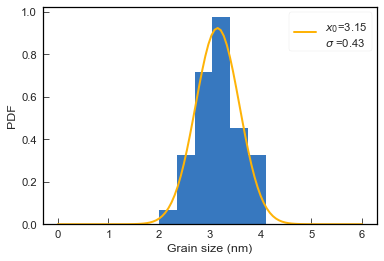

In [107]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Grains.csv',delimiter='\t',index_col='index')
X = df['diameter'].values

#MLE
P = ss.norm.fit(X)
print P
#not exactly 0.5 and 1.2, due to being a finite sample

#plotting
rX = np.linspace(0,6, 100)
rP = ss.norm.pdf(rX, *P)
#Yup, just unpack P with *P, instead of scale=XX and shape=XX, etc.

#need to plot the normalized histogram with `normed=True`
plt.hist(X, normed=True,bins=6)
plt.plot(rX, rP)
plt.xlabel('Grain size (nm)')
plt.ylabel('PDF')

label = '$x_0$=%.2f\n$\sigma$ =%.2f'%(P[0],P[1])
plt.legend([label])

# Fit

# 2D fit